In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## implementar a função que identifica a bandeira
## a função deve receber uma imagem e retornar a bandeira identificada
## a função deve retornar uma lista de tuplas, onde cada tupla contém as coordenadas de um dos cantos da bandeira
## [(PAIS, (x1, y2), (x2, y2)`),(PAIS, (x1, y2), (x2, y2)`),(PAIS, (x1, y2), (x2, y2)`),...]
paises = {
    "Peru": [(15, 20, 220), (255, 255, 255)],
    "Singapura": [(50, 40, 240), (255, 255, 255)],
    "Monaco": [(40, 20, 210), (255, 255, 255)],
    "Italia": [(50, 140, 0), (55, 40, 210)],
    "Irlanda": [(100, 155, 20), (60, 135, 255)]
}


def detectar_contornos(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, mascara = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)
    contornos, _ = cv2.findContours(mascara, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contornos

def verificar_cores(roi, cores, tolerancia=20, limite_fração=0.1):
    total_pixels = roi.shape[0] * roi.shape[1]
    limite_area = limite_fração * total_pixels
    
    for cor in cores:
        lower = np.clip(np.array(cor) - tolerancia, 0, 255)
        upper = np.clip(np.array(cor) + tolerancia, 0, 255)
        
        mascara = np.all((roi >= lower) & (roi <= upper), axis=-1)
        quantidade_pixels = np.count_nonzero(mascara)
        
        if quantidade_pixels <= limite_area:
            return False
    
    return True

def identifica_bandeira(img):
    resultados = []
    contornos = detectar_contornos(img)

    for contorno in contornos:
        x, y, w, h = cv2.boundingRect(contorno)
        
        roi = img[y:y+h, x:x+w]        
        for nome_pais, cores in paises.items():
            if verificar_cores(roi, cores):
                pais = nome_pais
                break
        
        resultados.append((pais, (x, y), (x + w, y + h)))

    return resultados



In [3]:
## nao alterar essa função
# Função para desenhar as bandeiras identificadas
def draw_bandeiras(lista_bandeiras, bgr):
    try:
        for bandeira in lista_bandeiras:
            cv2.rectangle(bgr, bandeira[1], bandeira[2], (255, 0, 0), 5)
            cv2.putText(bgr, bandeira[0], bandeira[1], cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
        return bgr
    except Exception as e:
        return bgr

[('Irlanda', (705, 589), (971, 723)), ('Italia', (343, 298), (608, 475))]


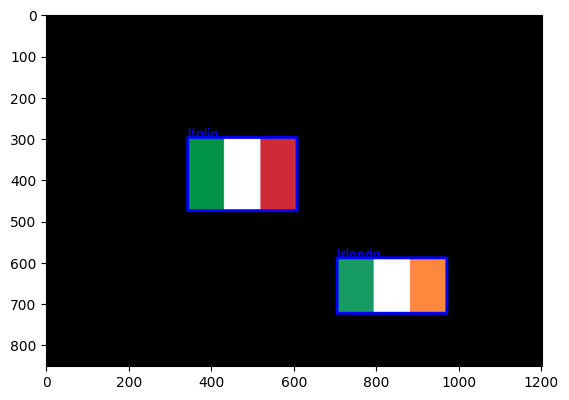

In [5]:
## Para testar a função identifica_bandeira

# Você pode testar a função identifica_bandeira com as imagens de teste fornecidas
# 
# img = cv2.imread('img/teste1.png')
img = cv2.imread('img/teste2.png')
# img = cv2.imread('img/teste3.png')
# img = cv2.imread('img/teste4.png')

# Chamar a função identifica_bandeira
resultado = identifica_bandeira(img)

# Imprimir o resultado da função identifica_bandeira 
print(resultado)

# Desenhar as bandeiras na imagem
bgr = draw_bandeiras(resultado, img)
plt.imshow(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB))
plt.show()


